In [1]:
import pandas as pd
df = pd.read_csv('movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
df[df['title'].str.contains('Toy Story')]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2355,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
7355,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX


In [4]:
genres = df['genres'].str.get_dummies()
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_movies = pd.concat([df, genres], axis=1)
df_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_genres = scaler.fit_transform(genres)
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [10]:
dft = pd.DataFrame(scaled_genres)
dft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.05918,-0.480607,2.591019,3.865793,3.697524,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
1,-0.05918,-0.480607,2.591019,-0.258679,3.697524,-0.792126,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
2,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
3,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
4,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065


In [11]:
genres.sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [31]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(scaled_genres)

KMeans(n_clusters=3)

In [32]:
model.labels_

array([0, 0, 2, ..., 2, 0, 2], dtype=int32)

In [33]:
model.cluster_centers_

array([[-0.05917995,  0.7939347 ,  1.55369876,  1.15141774,  0.98197068,
        -0.09215688, -0.24568268, -0.21174312, -0.58466974,  0.8424749 ,
        -0.08224128, -0.27647788,  0.52818189,  0.13948921, -0.17898056,
        -0.28626211,  0.68713182, -0.11434291, -0.04831949,  0.01043247],
       [-0.05917995, -0.13538705, -0.32123181, -0.22879168, -0.24744847,
        -0.44821229,  0.07313356, -0.20353172, -0.31296086, -0.03833499,
         0.08993504,  1.95425364, -0.07102942, -0.14461232,  1.41005728,
        -0.29187867,  0.32083976,  0.84174344, -0.18335294, -0.07065604],
       [ 0.02704964, -0.17107395, -0.3231677 , -0.24140646, -0.19507986,
         0.11561291,  0.04649115,  0.09508753,  0.21115652, -0.20327335,
         0.00205295, -0.3340552 , -0.11774039, -0.00511799, -0.24617224,
         0.13200237, -0.23846721, -0.14507437,  0.0499567 ,  0.01196837]])

In [34]:
df_clusters = pd.DataFrame(model.cluster_centers_, columns=genres.columns)
df_clusters.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,0.793935,1.553699,1.151418,0.981971,-0.092157,-0.245683,-0.211743,-0.584670,0.842475,-0.082241,-0.276478,0.528182,0.139489,-0.178981,-0.286262,0.687132,-0.114343,-0.048319,0.010432
1,-0.05918,-0.135387,-0.321232,-0.228792,-0.247448,-0.448212,0.073134,-0.203532,-0.312961,-0.038335,0.089935,1.954254,-0.071029,-0.144612,1.410057,-0.291879,0.320840,0.841743,-0.183353,-0.070656
2,0.02705,-0.171074,-0.323168,-0.241406,-0.195080,0.115613,0.046491,0.095088,0.211157,-0.203273,0.002053,-0.334055,-0.117740,-0.005118,-0.246172,0.132002,-0.238467,-0.145074,0.049957,0.011968


In [36]:
df_clusters.transpose()

,0,1,2
(no genres listed),-0.059180,-0.059180,0.027050
Action,0.793935,-0.135387,-0.171074
Adventure,1.553699,-0.321232,-0.323168
Animation,1.151418,-0.228792,-0.241406
Children,0.981971,-0.247448,-0.195080
Comedy,-0.092157,-0.448212,0.115613
Crime,-0.245683,0.073134,0.046491
Documentary,-0.211743,-0.203532,0.095088
Drama,-0.584670,-0.312961,0.211157
Fantasy,0.842475,-0.038335,-0.203273


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa220de8580>,
      dtype=object)

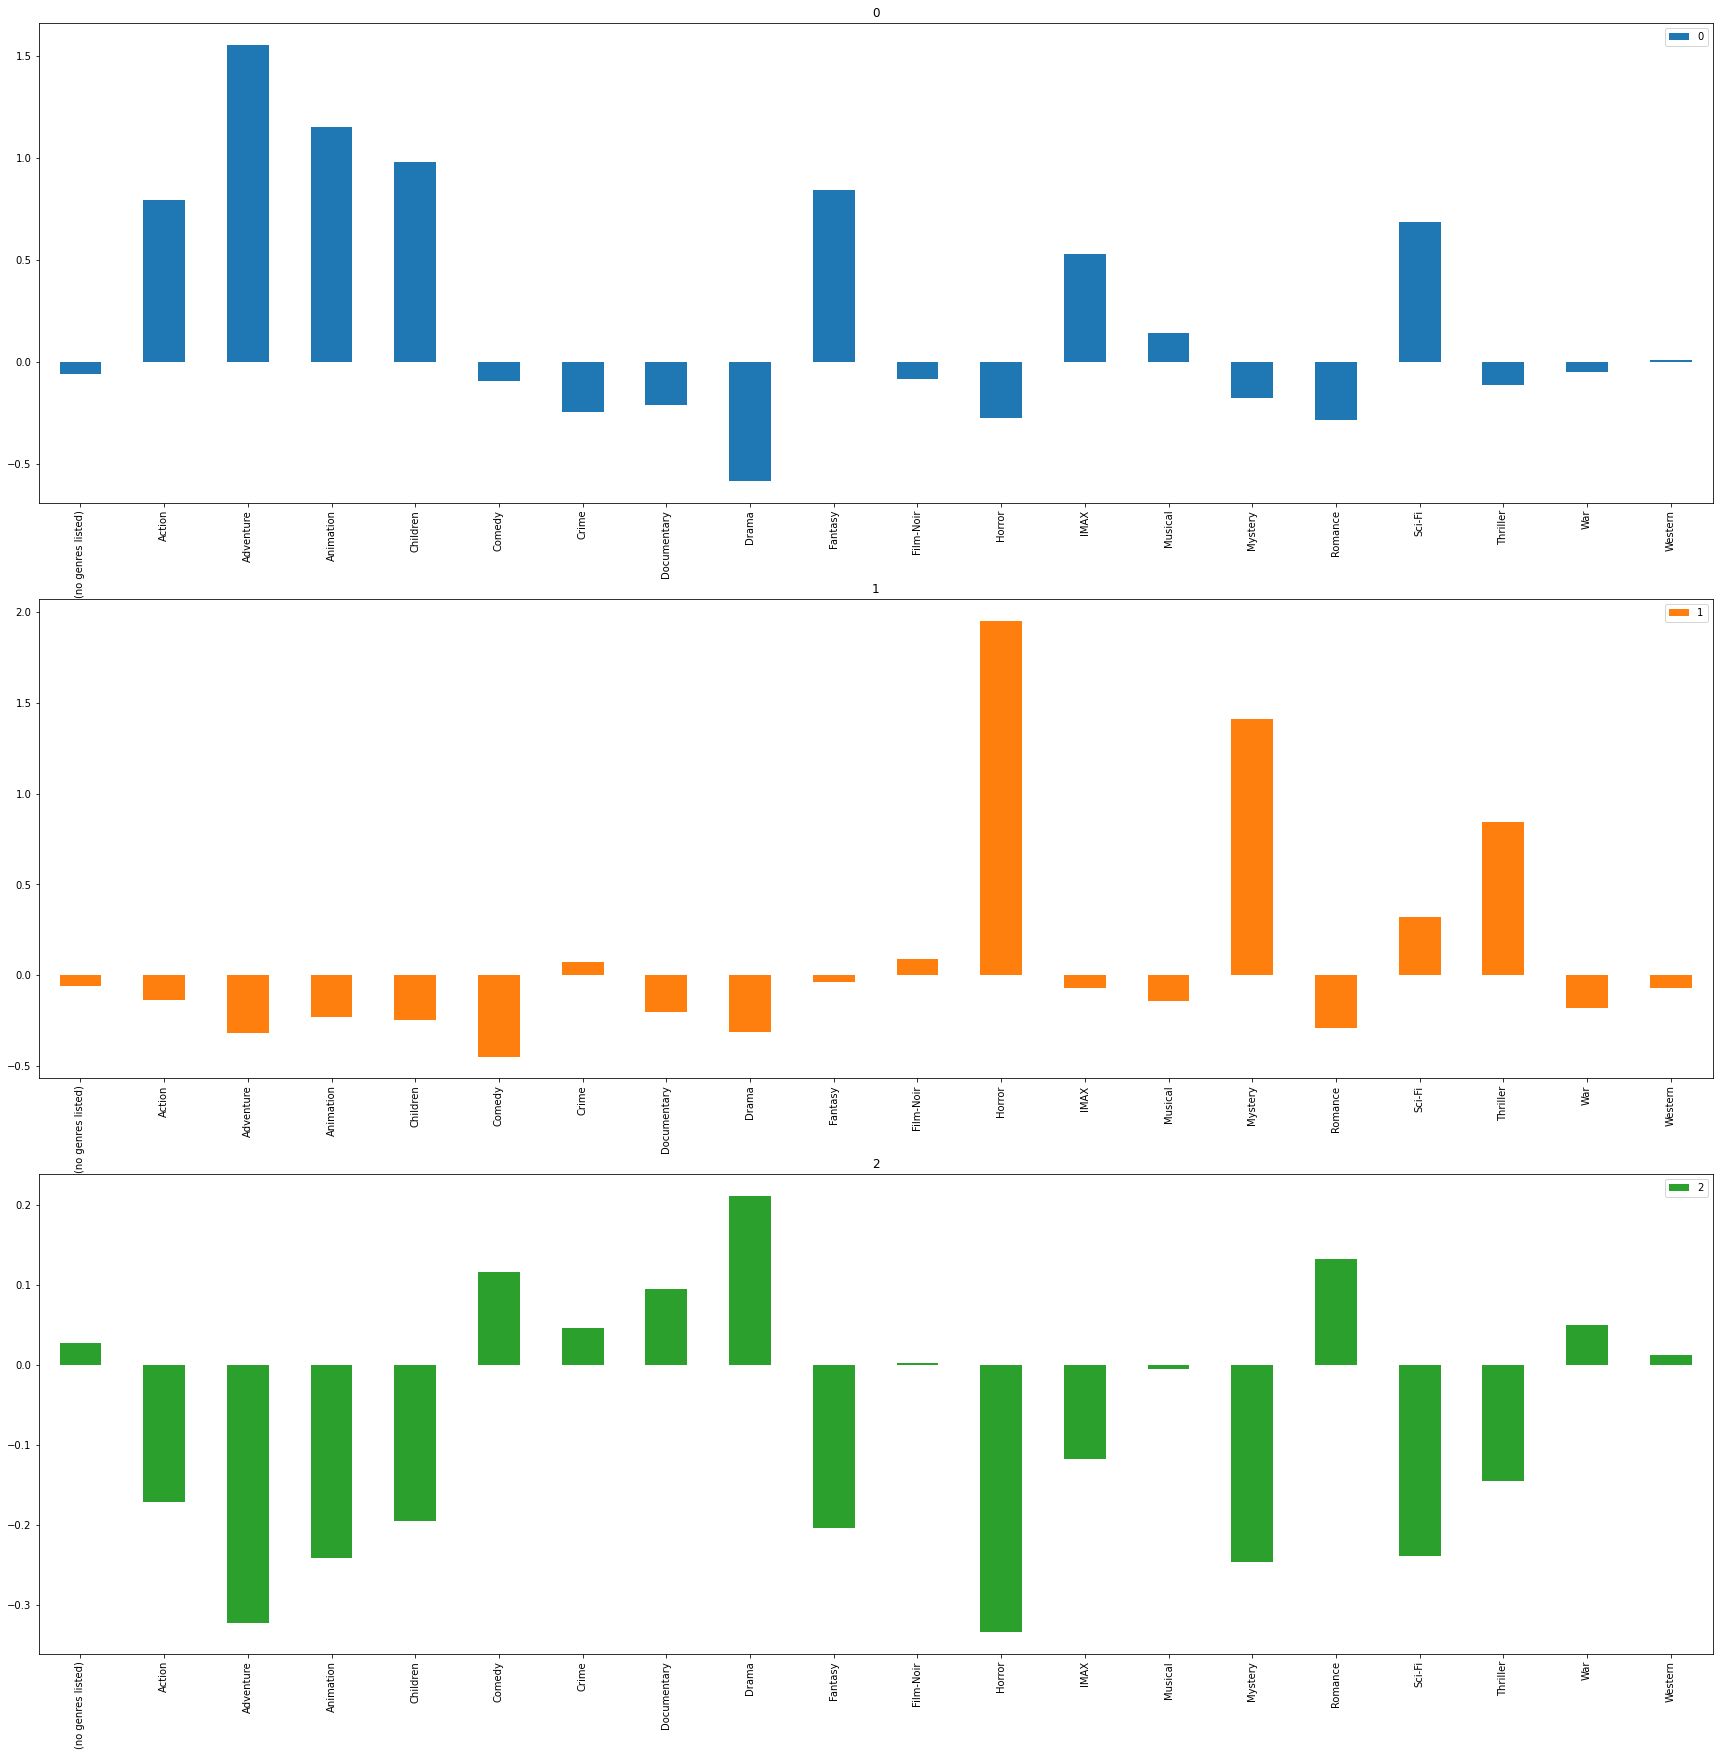

In [41]:
df_clusters.transpose().plot.bar(subplots=True, figsize=(30,30),  sharex=False)

In [42]:
df_movies[model.labels_ == 0].head(15)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,13,Balto (1995),Adventure|Animation|Children,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,15,Cutthroat Island (1995),Action|Adventure|Romance,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
40,44,Mortal Kombat (1995),Action|Adventure|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
53,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=20)
model.fit(scaled_genres)

KMeans(n_clusters=20)

In [44]:
df_movies[model.labels_ == 0].head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10,11,"American President, The (1995)",Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
16,17,Sense and Sensibility (1995),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24,25,Leaving Las Vegas (1995),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
27,28,Persuasion (1995),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
df_clusters = pd.DataFrame(model.cluster_centers_, columns=genres.columns)
df_clusters.head(20)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.452767,-0.288873,-0.258679,-0.270451,0.022995,-0.279509,-0.217489,1.004243,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.271196,-0.412295,-0.202020,-0.132065
1,-0.059180,-0.327298,-0.292246,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.424982,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,0.099686,-0.334435,-0.469094,-0.202020,-0.132065
2,-0.059180,0.485635,-0.293252,-0.258679,-0.270451,-0.117938,2.669289,-0.217489,0.224498,-0.285979,-0.094926,-0.322100,-0.128397,-0.188419,-0.249986,-0.329383,-0.302583,0.652630,-0.202020,-0.132065
3,-0.059180,-0.368538,-0.299812,-0.258679,-0.270451,-0.779077,-0.374632,-0.217489,0.991591,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.025834,-0.202020,-0.132065
4,-0.059180,0.453320,-0.379449,-0.258679,-0.261788,-0.397365,-0.301524,-0.217489,-0.522625,-0.246511,-0.094926,0.930132,-0.128397,-0.188419,-0.249986,-0.342347,2.990120,0.468722,-0.202020,-0.132065
5,-0.059180,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
6,-0.059180,0.404605,0.035718,-0.211943,-0.259210,-0.466192,-0.297025,-0.190207,0.751893,-0.253033,-0.094926,-0.305776,-0.128397,-0.188419,-0.213866,-0.052283,-0.240255,-0.197773,4.950012,-0.132065
7,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
8,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
9,-0.059180,-0.179276,1.146314,3.865793,3.697524,0.280470,-0.296295,-0.217489,-0.744982,0.803105,-0.094926,-0.321821,-0.128397,0.801623,-0.203109,-0.234036,-0.102205,-0.491259,-0.164137,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2211de880>,
      dtype=object)

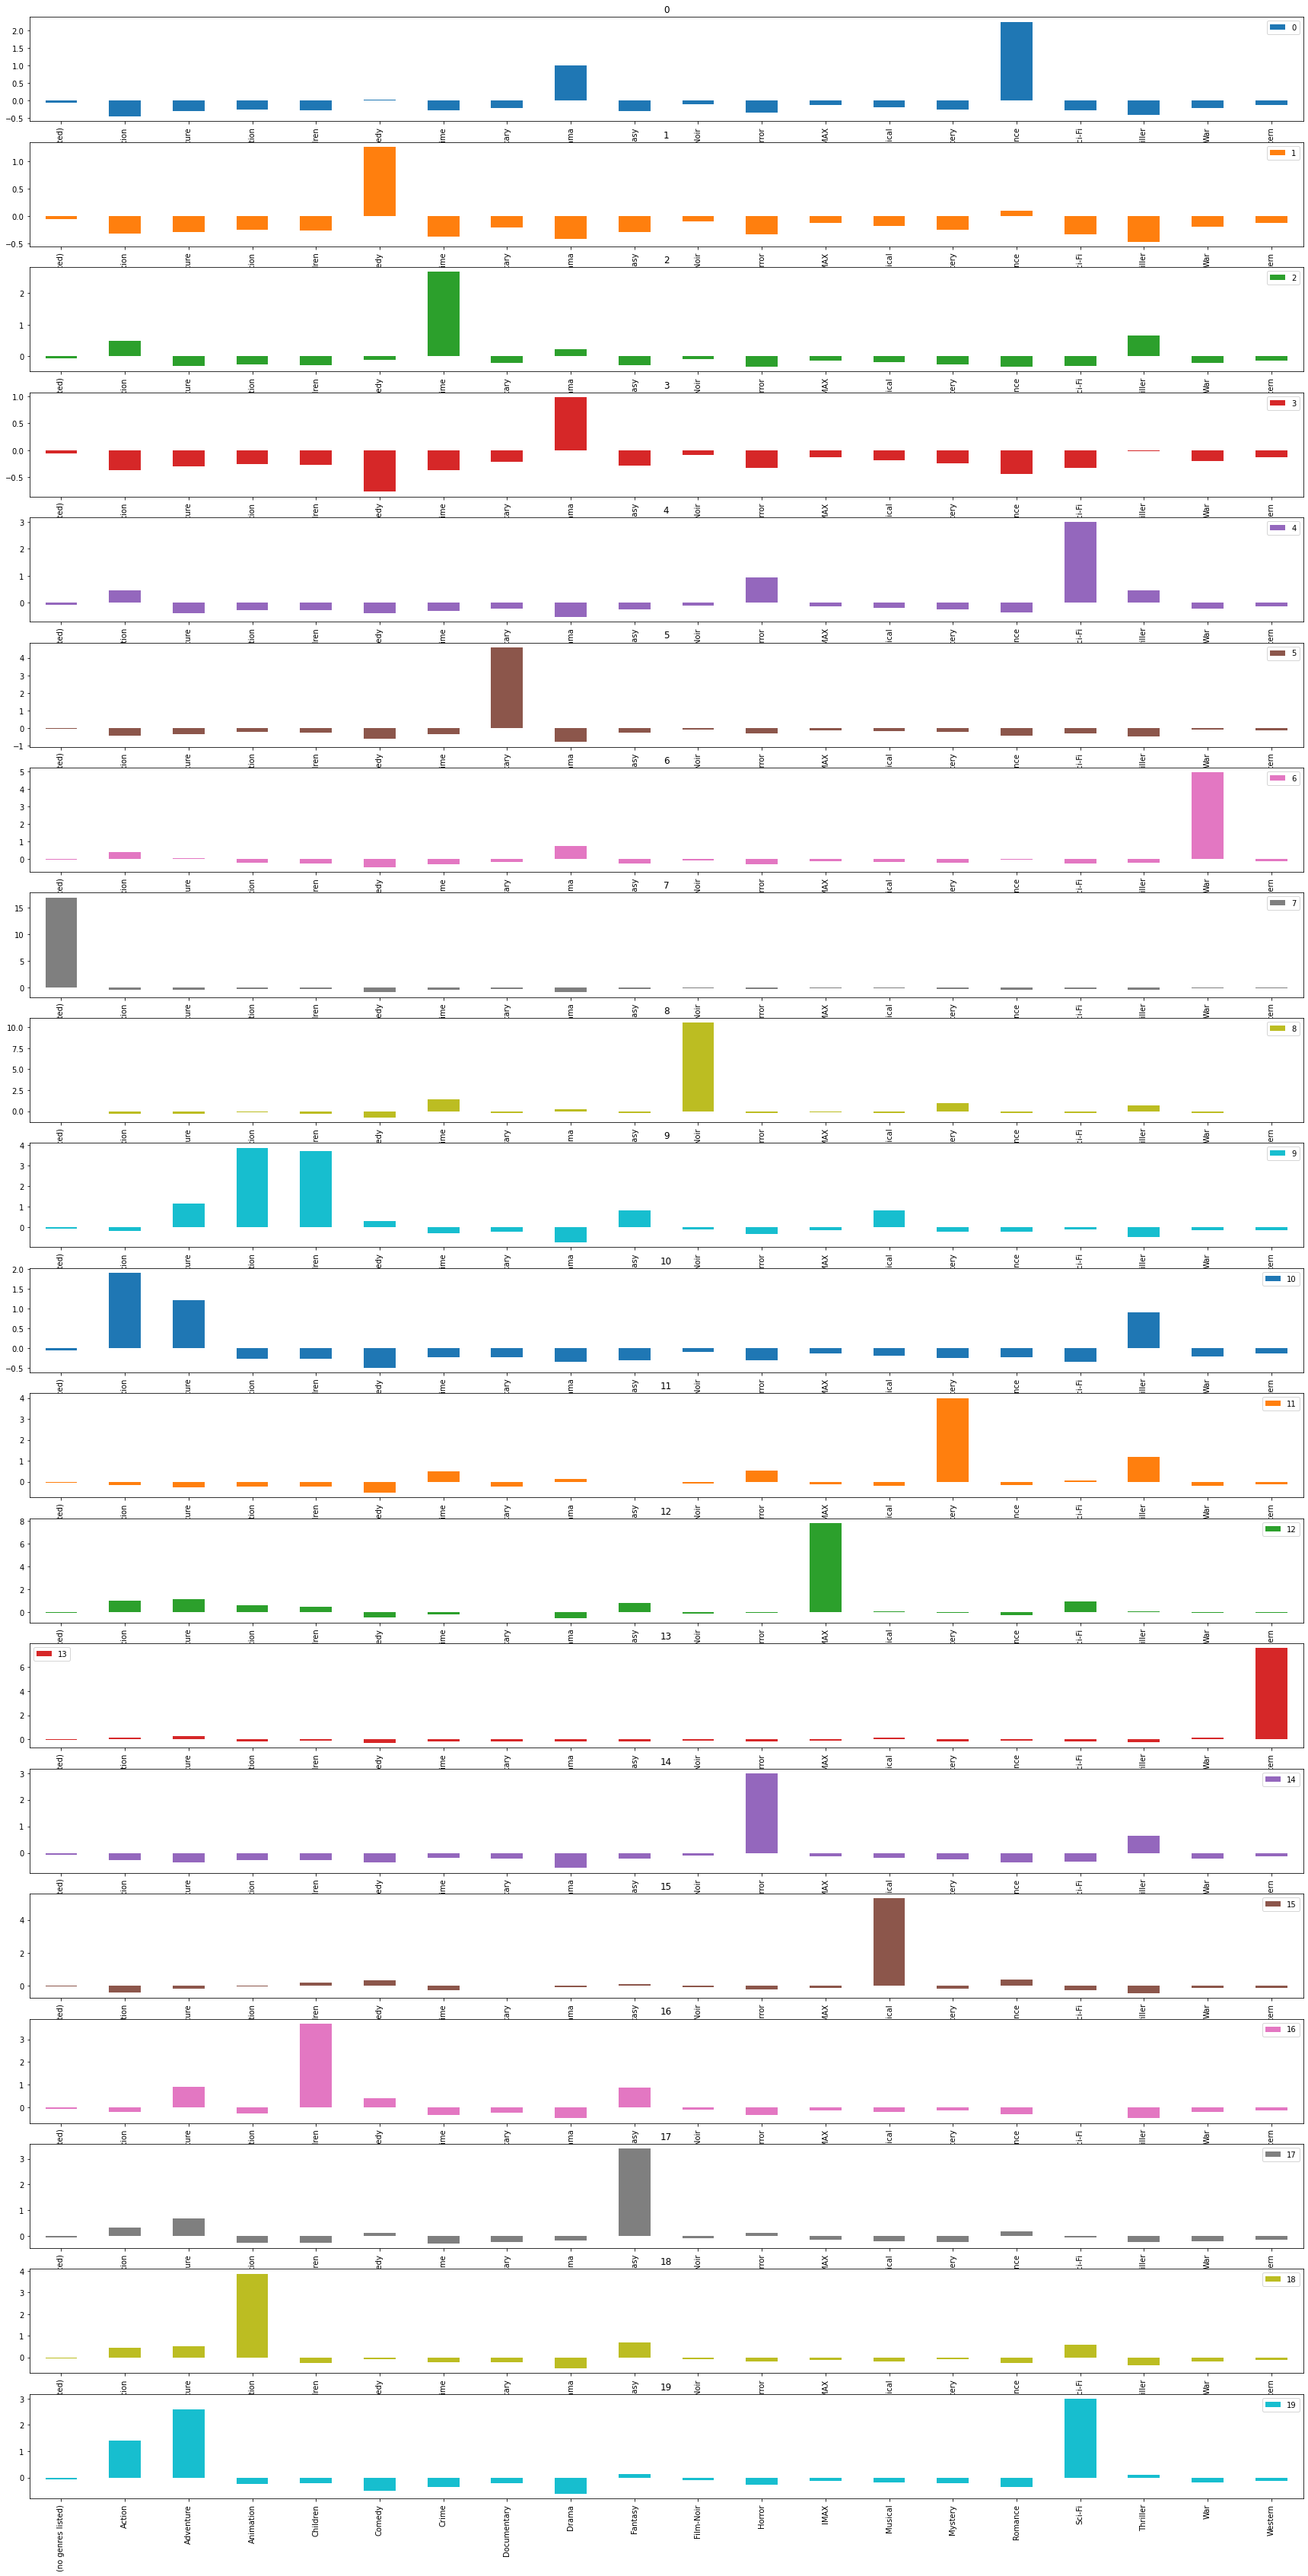

In [52]:
df_clusters.transpose().plot.bar(figsize=(30,60), subplots=True, sharex=False)

In [55]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(scaled_genres)

In [54]:
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [61]:
visualizacao

array([[-52.4051    ,  36.11448   ],
       [ 50.285675  ,  60.617805  ],
       [-45.46248   ,  -7.0122104 ],
       ...,
       [ 30.38116   , -12.529461  ],
       [ -4.588138  , -16.979244  ],
       [ -0.28215927,   9.865689  ]], dtype=float32)

In [57]:
import seaborn as sns

In [65]:
sns.set(rc={'figure.figsize': (10,10)})

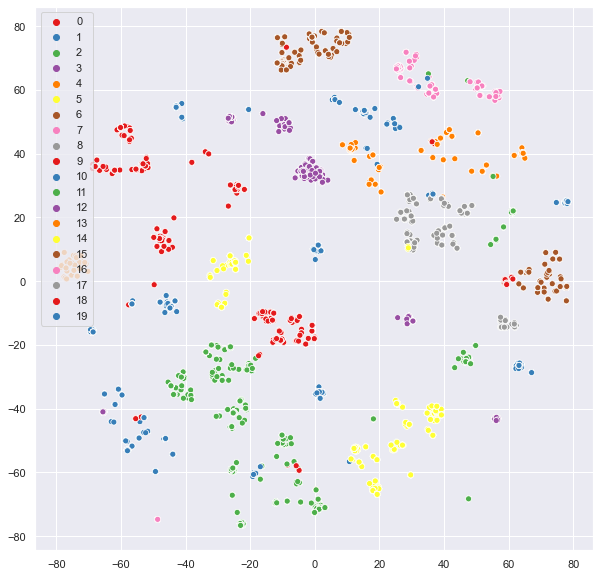

In [70]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=model.labels_, palette=sns.color_palette('Set1', 20))

In [71]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(scaled_genres)


KMeans(n_clusters=3)

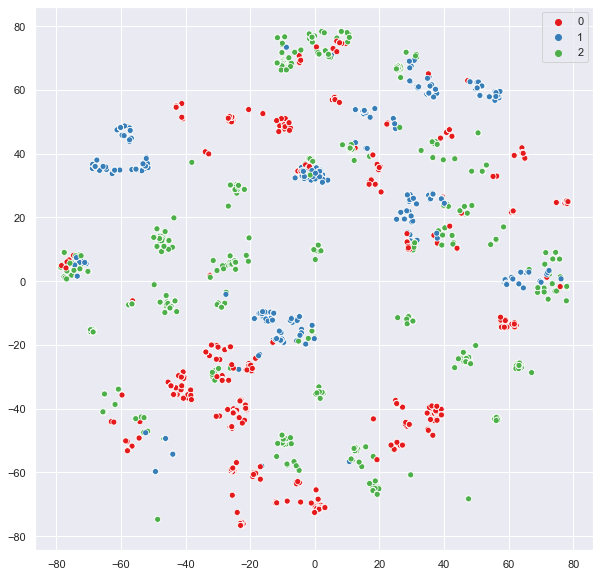

In [72]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=model.labels_, palette=sns.color_palette('Set1', 3))

In [81]:
from sklearn.cluster import KMeans

def get_kmeans(numero_clusters):
    
    model = KMeans(n_clusters=numero_clusters)
    model.fit(scaled_genres)
    return [numero_clusters, model.inertia_]

In [82]:
get_kmeans(3)

[3, 168030.5945185595]

In [83]:
get_kmeans(20)

[20, 55072.03575988675]

In [84]:
get_kmeans(41)

[41, 34773.91331450529]

In [92]:
resultado = []

for numero_clusters in range(1, 41):
    r = get_kmeans(numero_clusters)
    resultado.append(r)

In [93]:
resultado = pd.DataFrame(resultado, columns=['clusters', 'inertia'])

In [94]:
resultado.head()

,clusters,inertia
0,1,194840.000000
1,2,179484.013047
2,3,166119.513653
3,4,157614.415768
4,5,147708.517286


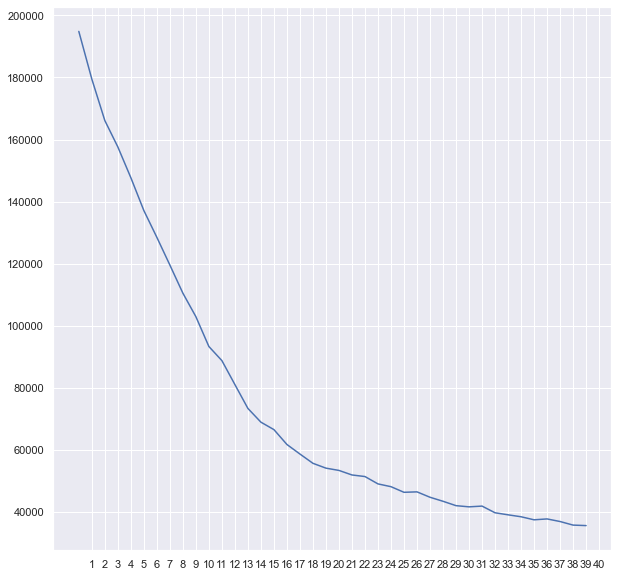

In [95]:
resultado['inertia'].plot(xticks=resultado['clusters'])

In [96]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=14)
model.fit(scaled_genres)

KMeans(n_clusters=14)

In [97]:
df_clusters = pd.DataFrame(model.cluster_centers_, columns=genres.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa21809ef10>,
      dtype=object)

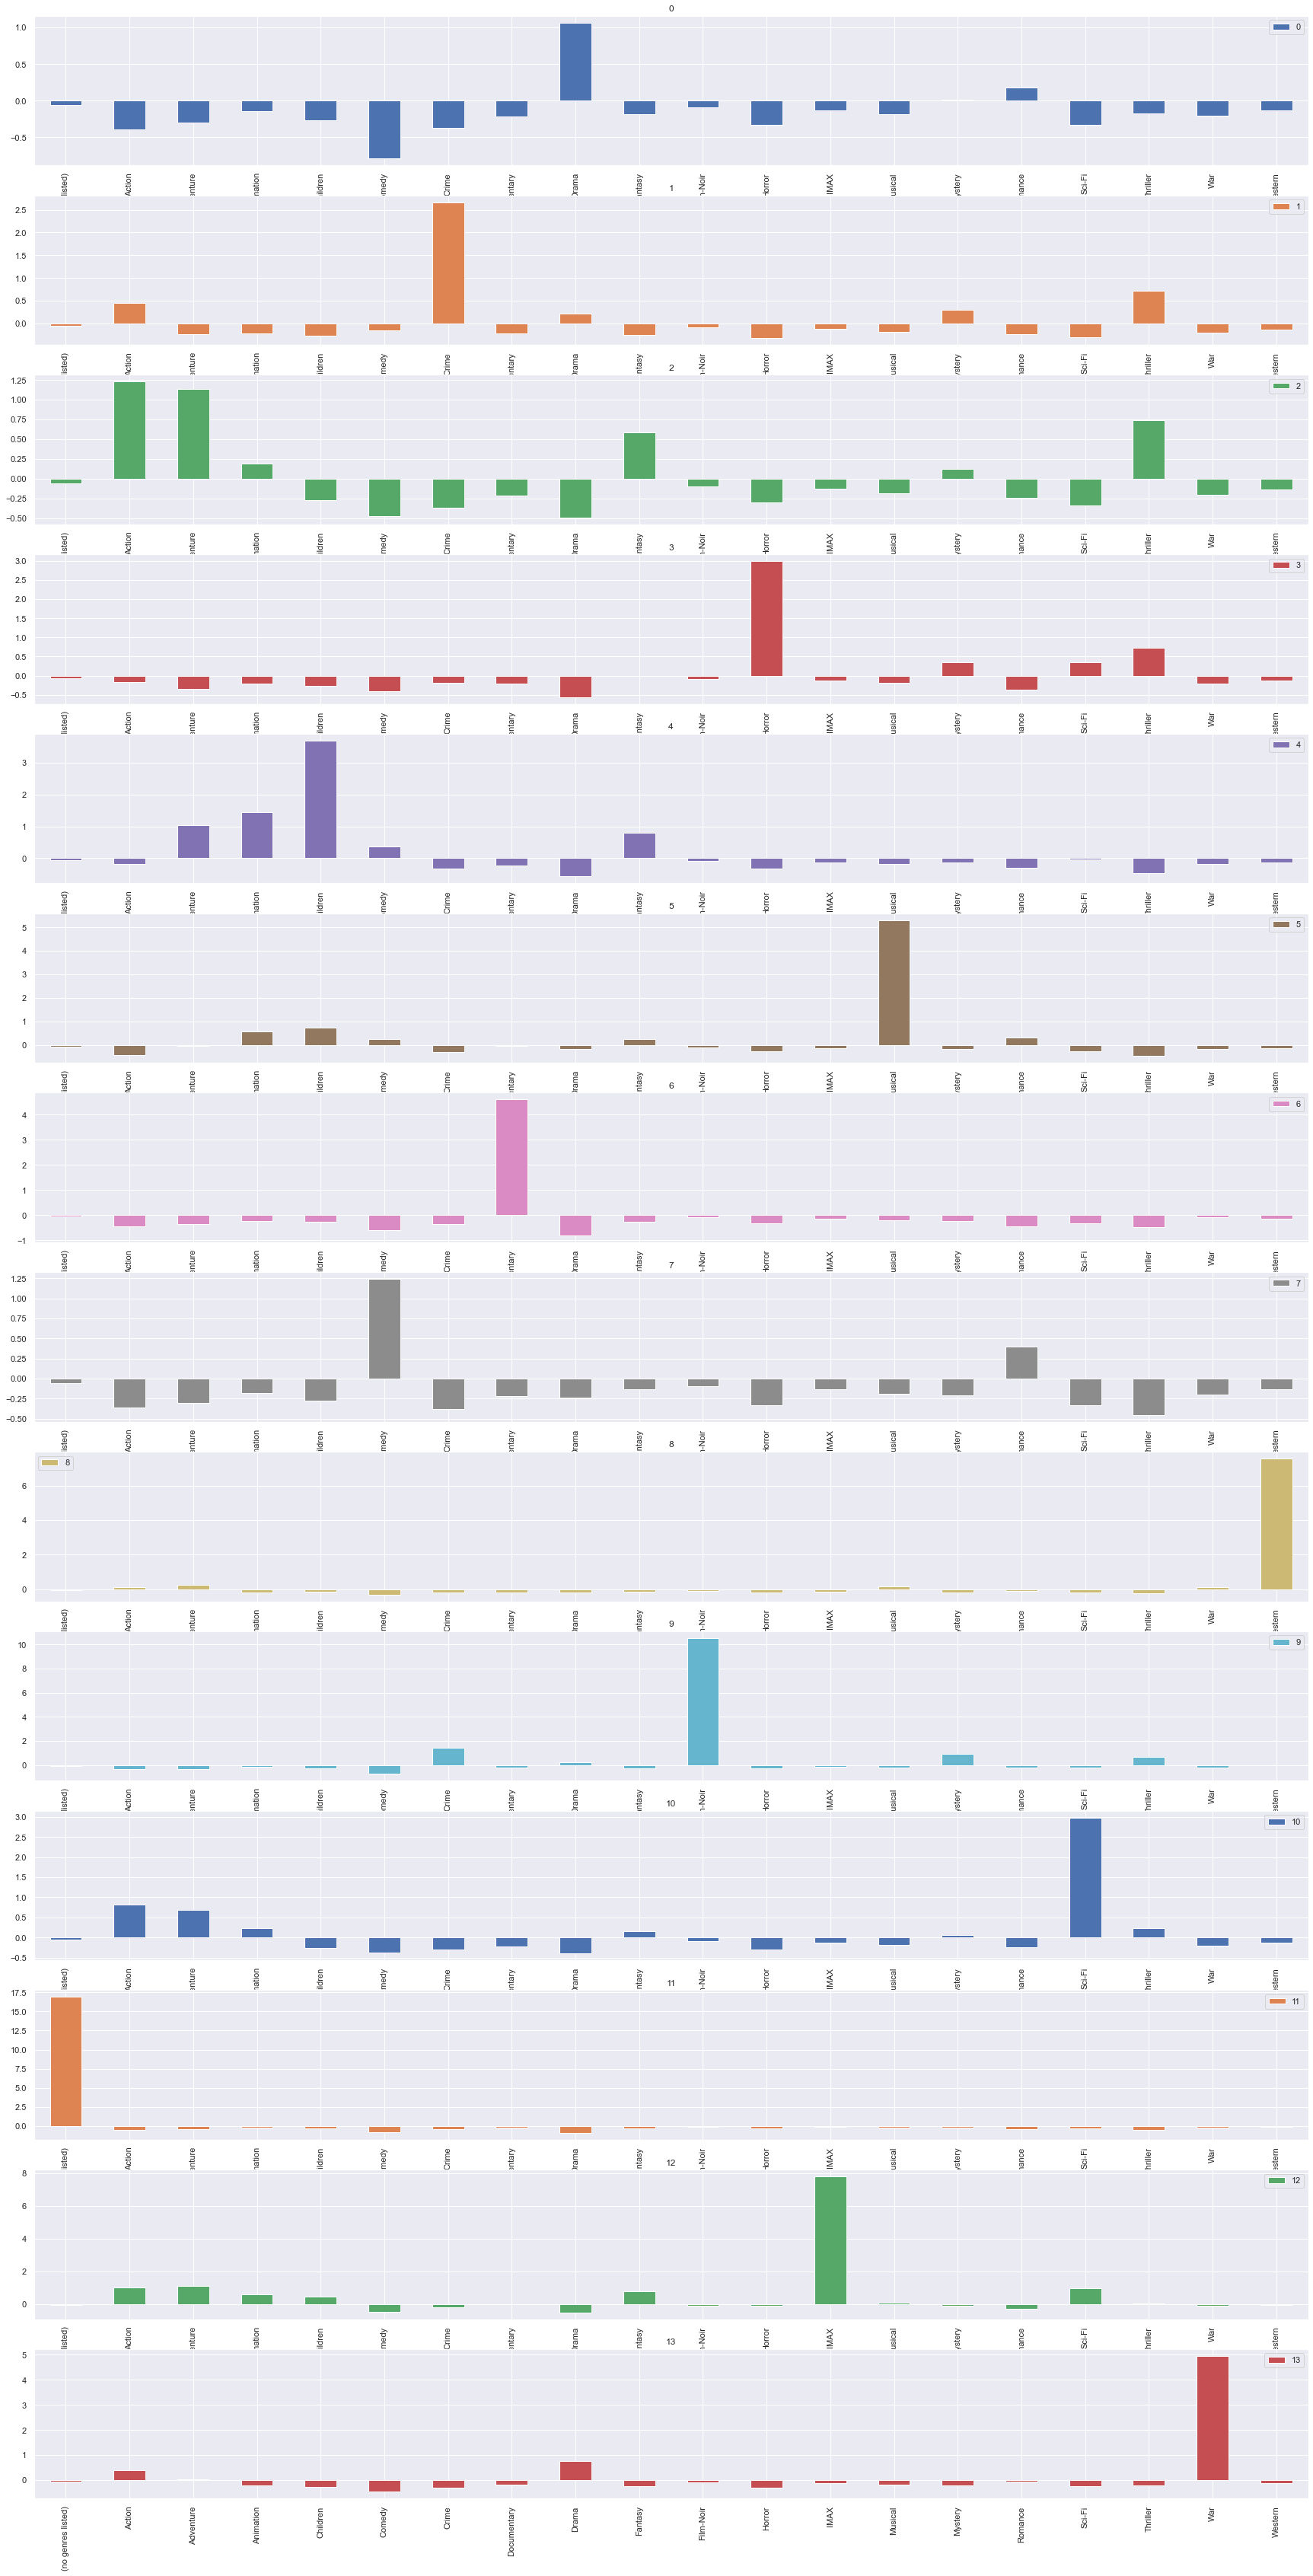

In [99]:
df_clusters.transpose().plot.bar(figsize=(30,60), subplots=True, sharex=False)

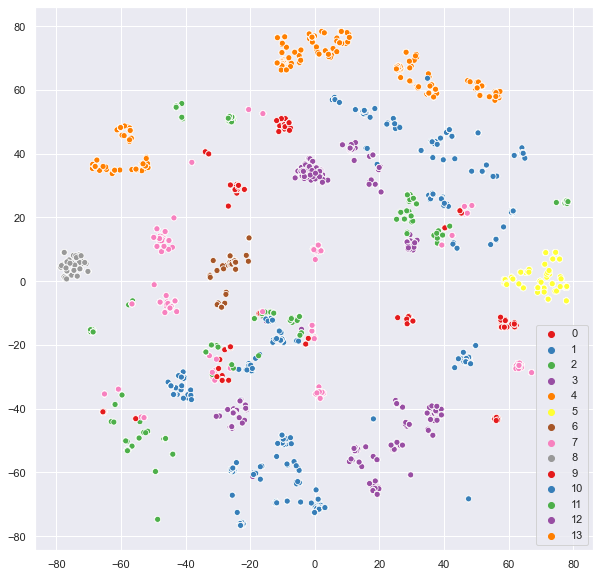

In [100]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=model.labels_, palette=sns.color_palette('Set1', 14))

In [108]:
df_movies[model.labels_ == 7]

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10,11,"American President, The (1995)",Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9718,189043,Boundaries (2018),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9726,190209,Jeff Ross Roasts the Border (2017),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9734,193571,Silver Spoon (2014),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
